<a href="https://colab.research.google.com/github/withravel/NUS-MCom/blob/IS5006/FuzzyLogic_Example_v02.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In this activity we will see a python code that, using third-party library, calculates the grade of a list of cryptocurrencies by implementing fuzzy logic.

Each crypto has the yearly return and risk value (assumed in percentage), and with fuzzy logic, each of them will be mapped into a grade of ranged from 0 to 100. 


In [ ]:
!pip install scikit-fuzzy

     |████████████████████████████████| 1.0MB 12.0MB/s 
  Created wheel for scikit-fuzzy: filename=scikit_fuzzy-0.4.2-cp36-none-any.whl size=894070 sha256=dbde86c91208f442b6a5d44f85088be53d48ba6a2dcf7b7873f5325bb804e0d1
  Stored in directory: /root/.cache/pip/wheels/b9/4e/77/da79b16f64ef1738d95486e2731eea09d73e90a72465096600
Successfully built scikit-fuzzy


In [ ]:
import skfuzzy as fuzz
import numpy as np
from skfuzzy import control as ctrl

The data set with the format of crypto name, yearly return in percentage and risk in percentage

In [ ]:
cryptos = [
    ('a', 5, 1), ('b', 6, 2), ('c', 8, 1),
    ('d', 8, 3), ('e', 9, 2), ('f', 10, 2),
    ('g', 11, 10), ('h', 12, 8), ('i', 13, 2),
    ('j', 14, 12), ('k', 15, 10)
]

for example: printing out the data set to console 

In [ ]:
cryptos

[('a', 5, 1),
 ('b', 6, 2),
 ('c', 8, 1),
 ('d', 8, 3),
 ('e', 9, 2),
 ('f', 10, 2),
 ('g', 11, 10),
 ('h', 12, 8),
 ('i', 13, 2),
 ('j', 14, 12),
 ('k', 15, 10)]

Example of the rule


In [ ]:
x=1

In [ ]:
if cryptos[x][1] > cryptos[x-1][1] :
  print("Crypto " + cryptos[x][0]+ " is a better choice")

Finding how many elements inside cryptos

In [ ]:
 length = len(cryptos)
    

Declare the result variable - currently empty


In [ ]:
myResult = ''


Looking through the first element in data set ('a', 5, 1)

In [ ]:
crypto = cryptos[0]

Printing the first element for checking, this is example of fact

In [ ]:
crypto

('a', 5, 1)

Getting the curYearlyReturn and curRisk from the crypto as the antecendents 

In [ ]:
curYearlyReturn = crypto[1]
curRisk = crypto[2]

Setting the universe set of the input - this number is depending on the requirement/situation
In this example, it means that the possible yearly return value is anything from 0 to 20 (percent)
The possible risk value is anything from 0 to 15 (percent)
The range is inclusive of the first param but up to the second param
The third range param is for the 'step' between values ( in example, this is 0,1,2,....)

In [ ]:
yearlyReturn = ctrl.Antecedent(np.arange(0, 21, 1), 'yearlyReturn')
risk = ctrl.Antecedent(np.arange(0, 16, 1), 'risk')

Check that yearlyReturn is an antecedent

In [ ]:
yearlyReturn

Antecedent: yearlyReturn

Check that the risk is an antecedent

In [ ]:
risk

Antecedent: risk

Setting the universe set of the output - this number is depending on the requirement/situation
In this example, the crypto is graded in anything between 0 to 100

In [ ]:
grade = ctrl.Consequent(np.arange(0, 101, 1), 'grade')

Check that grade is a consequence

In [ ]:
grade

Consequent: grade

Auto-membership function population is possible with .automf(3, 5, or 7)
You can try with different value
3, 5, or 7 means the universe set is divided by 3, 5, or 7 categories
Below is setting the yearlyReturn membership distribution with automf

In [ ]:
yearlyReturn.automf(3)

View yearlyReturn diagram 

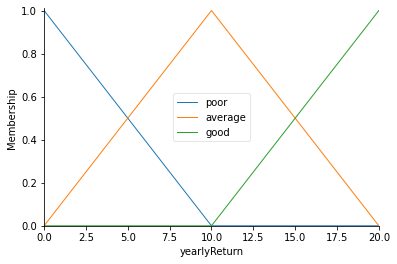

In [ ]:
yearlyReturn.view()

Set the membership function of risk using custome membership function . 
Risk is customized because by default the smaller number is equal worse while with risk the smaller the risk is the better

Custom membership functions can be built interactively with a familiar customize membership plotting
The example below is equivalent with automf(3), but you can try play around with the value to change the shape
The first parameter is the start point, the second is the peak point, and the third is the end point


In [ ]:
risk['good'] = fuzz.trimf(risk.universe, [0, 0, 7.5])
risk['average'] = fuzz.trimf(risk.universe, [0, 7.5, 15])
risk['poor'] = fuzz.trimf(risk.universe, [7.5, 15, 15])

View the risk diagram 
  
The .view function will make the diagram pop out for reference.

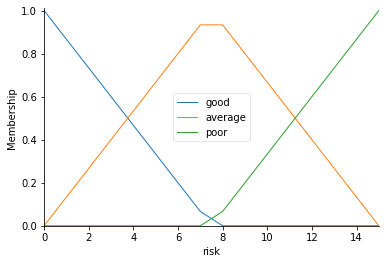

In [ ]:
risk.view()

Set the membership function of grade using custom membership function

In [ ]:
grade['notProfitable'] = fuzz.trimf(grade.universe, [0, 0, 50])
grade['enoughProfitable'] = fuzz.trimf(grade.universe, [0, 50, 100])
grade['veryProfitable'] = fuzz.trimf(grade.universe, [50, 100, 100])

View the grade diagram 

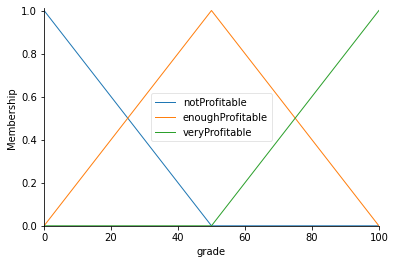

In [ ]:
grade.view()

Create the rule that will maps between the antecendents (yearlyReturn and risk) and consequence (grade)

The first param in rule is the logic / requirements while the second param is the result

In [ ]:
rule1 = ctrl.Rule(yearlyReturn['poor'] | risk['poor'], grade['notProfitable'])
rule2 = ctrl.Rule(yearlyReturn['average'], grade['enoughProfitable'])
rule3 = ctrl.Rule(yearlyReturn['good'] | risk['good'], grade['veryProfitable'])

Assign the rules

In [ ]:
investment_ctrl = ctrl.ControlSystem([rule1, rule2, rule3])
investment = ctrl.ControlSystemSimulation(investment_ctrl)

Assign the value of crypto (cryptos[0] -> ('a', 5,1) into the input

In [ ]:
investment.input['yearlyReturn'] = curYearlyReturn
investment.input['risk'] = curRisk

Crunch the numbers

In [ ]:
investment.compute()

Generate the diagram for the result 

Crypto for consideration a with grade 54.28599081909185



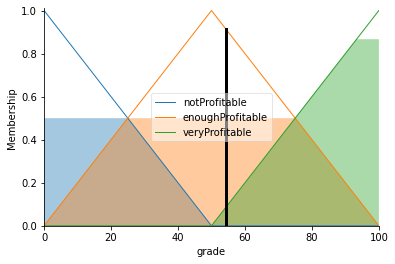

In [ ]:
tempGrade = investment.output['grade']
tempResult = "Crypto for consideration " + crypto[0] + ' with grade ' + str(tempGrade) + '\n'
print(tempResult)
grade.view(sim=investment)